# Trained single-cell gene mutation classification model exploration

Andrew Ashford, Pathways + Omics Group - OHSU, 6/10/2024

This Jupyter Notebook will be used to read in and explore some of the trained single-cell gene mutation classification models. Specifically, to compare the performance between the 100 features from the Scanorama-integrated data and the 2000 normalized and scaled gene features that the bulk and single-cell data shares.

In [7]:
# Import modules
import pandas as pd
import numpy as np
import scanpy as sc


#### Specify file locations

In [8]:
# Specify directory of both trained models since they're located in the same directory
save_dir = '/home/groups/precepts/ashforda/scOPE_github_stuff/data/testing/vanGalen_all_h5ad/'


In [9]:
# Model trained using 100 integrated latent features location
integrated_feature_trained_model_file = 'Scanorama-integrated_scRNA-seq_prediction_probabilities.h5ad'


In [10]:
# Model trained using 2000 normalized and scaled gene features location
variable_genes_normed_scaled_model_file = '2000_variable_features_scRNA-seq_prediction_probabilities.h5ad'


#### Read in specified files

In [11]:
# Read the integrated feature-trained model using the ScanPy package
integrated_data_trained_model = sc.read_h5ad(save_dir + integrated_feature_trained_model_file)


In [12]:
# Read the integrated feature-trained model using the ScanPy package
variable_gene_data_trained_model = sc.read_h5ad(save_dir + variable_genes_normed_scaled_model_file)


#### Explore trained model objects & interrogate performance

In [13]:
print(integrated_data_trained_model)


AnnData object with n_obs × n_vars = 42668 × 100
    obs: 'orig.ident', 'NumberOfReads', 'CyclingScore', 'CyclingBinary', 'MutTranscripts', 'WtTranscripts', 'PredictionRefined', 'CellType', 'nCount_RNA', 'nFeature_RNA', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'batch', 'ridge_preds_TET2', 'rf_preds_TET2', 'svm_preds_TET2', 'ridge_preds_NPM1', 'rf_preds_NPM1', 'svm_preds_NPM1', 'ridge_preds_WT1', 'rf_preds_WT1', 'svm_preds_WT1', 'ridge_preds_DNMT3A', 'rf_preds_DNMT3A', 'svm_preds_DNMT3A', 'ridge_preds_SRSF2', 'rf_preds_SRSF2', 'svm_preds_SRSF2', 'ridge_preds_KRAS', 'rf_preds_KRAS', 'svm_preds_KRAS', 'ridge_preds_IDH2', 'rf_preds_IDH2', 'svm_preds_IDH2', 'ridge_preds_BCOR', 'rf_preds_BCOR', 'svm_preds_BCOR', 'ridge_preds_FLT3', 'rf_preds_FLT3', 'svm_preds_FLT3', 'ridge_preds_CEBPA', 'rf_preds_CEBPA', 'svm_preds_CEBPA', 'ridge_preds_SF3B1', 'rf_preds_SF3B1', 'svm_preds_SF3B1', 'ridge_preds_RUNX1', 'rf_preds_RUNX1', 'svm_preds_RUNX1', 'ridge_preds

In [14]:
print(variable_gene_data_trained_model)


AnnData object with n_obs × n_vars = 42668 × 5070
    obs: 'orig.ident', 'NumberOfReads', 'CyclingScore', 'CyclingBinary', 'MutTranscripts', 'WtTranscripts', 'PredictionRefined', 'CellType', 'nCount_RNA', 'nFeature_RNA', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'dataset', 'ridge_preds_TET2', 'rf_preds_TET2', 'svm_preds_TET2', 'ridge_preds_NPM1', 'rf_preds_NPM1', 'svm_preds_NPM1', 'ridge_preds_WT1', 'rf_preds_WT1', 'svm_preds_WT1', 'ridge_preds_DNMT3A', 'rf_preds_DNMT3A', 'svm_preds_DNMT3A', 'ridge_preds_SRSF2', 'rf_preds_SRSF2', 'svm_preds_SRSF2', 'ridge_preds_KRAS', 'rf_preds_KRAS', 'svm_preds_KRAS', 'ridge_preds_IDH2', 'rf_preds_IDH2', 'svm_preds_IDH2', 'ridge_preds_BCOR', 'rf_preds_BCOR', 'svm_preds_BCOR', 'ridge_preds_FLT3', 'rf_preds_FLT3', 'svm_preds_FLT3', 'ridge_preds_CEBPA', 'rf_preds_CEBPA', 'svm_preds_CEBPA', 'ridge_preds_SF3B1', 'rf_preds_SF3B1', 'svm_preds_SF3B1', 'ridge_preds_RUNX1', 'rf_preds_RUNX1', 'svm_preds_RUNX1', 'ridge_pr

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

def plot_patient_vs_healthy_prop(scRNA_data, specific_patient, specific_mutation):
    # Function to extract patient information from observation indices
    def extract_patient_id(index):
        match = re.match(r'(BM\d+|AML\d+[A-Z]?)', index)
        return match.group(0) if match else 'Unknown'

    scRNA_data.obs['Patient'] = scRNA_data.obs.index.map(extract_patient_id)

    # Extract predicted mutation status probabilities for the specific mutation
    predicted_probs = scRNA_data.obs[f'ridge_preds_{specific_mutation}']
    #predicted_probs = scRNA_data.obs[f'ensemble_preds_{specific_mutation}']
    print('predicted_probs', predicted_probs)

    # Filter for the specific patient and all healthy samples
    #patient_scores = predicted_probs[scRNA_data.obs['Patient'] == specific_patient]
    #patient_scores = predicted_probs[scRNA_data.obs['Patient'].str.startswith(specific_patient)]
    patient_scores = predicted_probs[scRNA_data.obs_names.str.startswith(specific_patient)]
    healthy_scores = predicted_probs[scRNA_data.obs['Patient'].str.startswith('BM')]

    
    # Create a DataFrame for easier plotting with seaborn
    scores_df = pd.DataFrame({
        'Scores': np.concatenate([patient_scores, healthy_scores]),
        'Sample': ['Patient'] * len(patient_scores) + ['Healthy'] * len(healthy_scores)
    })

    # Plot the distribution of scores for the specified mutation in the specific patient and healthy samples
    plt.figure(figsize=(14, 10))

    # Plot each sample type separately to ensure labels are included
    sns.histplot(data=scores_df[scores_df['Sample'] == 'Patient'], x='Scores', kde=True, element='step', stat='proportion', common_norm=False, bins=100, label='Patient ' + specific_patient)
    sns.histplot(data=scores_df[scores_df['Sample'] == 'Healthy'], x='Scores', kde=True, element='step', stat='proportion', common_norm=False, bins=100, label='Healthy samples')
    #sns.histplot(data=scores_df[scores_df['Sample'] == 'Patient'], x='Scores', kde=True, element='step', stat='count', common_norm=False, bins=100, label='Patient ' + specific_patient)
    #sns.histplot(data=scores_df[scores_df['Sample'] == 'Healthy'], x='Scores', kde=True, element='step', stat='count', common_norm=False, bins=100, label='Healthy samples')

    # Log-transform the y-axis
    #plt.yscale('log')
    
    # Manually add the legend
    plt.legend(title='Sample')

    plt.title(f'Distribution of Predicted Scores for {specific_mutation} Mutation in Patient {specific_patient} and 4 Healthy Samples')
    plt.xlabel('Score')
    plt.ylabel('Proportion')
    #plt.ylabel('log proportion')
    #plt.ylabel('Count')
    plt.show()

    

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

def plot_patient_vs_healthy_count(scRNA_data, specific_patient, specific_mutation):
    # Function to extract patient information from observation indices
    def extract_patient_id(index):
        match = re.match(r'(BM\d+|AML\d+[A-Z]?)', index)
        return match.group(0) if match else 'Unknown'

    scRNA_data.obs['Patient'] = scRNA_data.obs.index.map(extract_patient_id)

    # Extract predicted mutation status probabilities for the specific mutation
    predicted_probs = scRNA_data.obs[f'ridge_preds_{specific_mutation}']
    #predicted_probs = scRNA_data.obs[f'ensemble_preds_{specific_mutation}']

    # Filter for the specific patient and all healthy samples
    #patient_scores = predicted_probs[scRNA_data.obs['Patient'] == specific_patient]
    #patient_scores = predicted_probs[scRNA_data.obs['Patient'].str.startswith(specific_patient)]
    patient_scores = predicted_probs[scRNA_data.obs_names.str.startswith(specific_patient)]
    healthy_scores = predicted_probs[scRNA_data.obs['Patient'].str.startswith('BM')]
    

    # Create a DataFrame for easier plotting with seaborn
    scores_df = pd.DataFrame({
        'Scores': np.concatenate([patient_scores, healthy_scores]),
        'Sample': ['Patient'] * len(patient_scores) + ['Healthy'] * len(healthy_scores)
    })

    # Plot the distribution of scores for the specified mutation in the specific patient and healthy samples
    plt.figure(figsize=(14, 10))

    # Plot each sample type separately to ensure labels are included
    #sns.histplot(data=scores_df[scores_df['Sample'] == 'Patient'], x='Scores', kde=True, element='step', stat='proportion', common_norm=False, bins=100, label='Patient ' + specific_patient)
    #sns.histplot(data=scores_df[scores_df['Sample'] == 'Healthy'], x='Scores', kde=True, element='step', stat='proportion', common_norm=False, bins=100, label='Healthy samples')
    sns.histplot(data=scores_df[scores_df['Sample'] == 'Patient'], x='Scores', kde=True, element='step', stat='count', common_norm=False, bins=100, label='Patient ' + specific_patient)
    sns.histplot(data=scores_df[scores_df['Sample'] == 'Healthy'], x='Scores', kde=True, element='step', stat='count', common_norm=False, bins=100, label='Healthy samples')
    
    # The following does the same as "proportion" by making the area under the distribution sum to 1 for both
    #sns.histplot(data=scores_df[scores_df['Sample'] == 'Patient'], x='Scores', kde=True, element='step', stat='density', common_norm=False, bins=100, label='Patient ' + specific_patient)
    #sns.histplot(data=scores_df[scores_df['Sample'] == 'Healthy'], x='Scores', kde=True, element='step', stat='density', common_norm=False, bins=100, label='Healthy samples')

    
    
    # Log-transform the y-axis
    #plt.yscale('log')
    
    # Manually add the legend
    plt.legend(title='Sample')

    plt.title(f'Distribution of Predicted Scores for {specific_mutation} Mutation in Patient {specific_patient} and 4 Healthy Samples')
    plt.xlabel('Score')
    #plt.ylabel('Proportion')
    plt.ylabel('Count')
    #plt.ylabel('log count')
    #plt.ylabel('Density')
    plt.show()


In [17]:
# Separate out the patients and view their mutation predictions

# Patient AML1012 - Has only D0 samples
#specific_patient = 'AML1012'

# 65% blast count

# AML1012 mutations:
# KRAS.G13D - 4.6% VAF
#specific_mutation = 'KRAS' # No discernable signal

# NRAS.G13D - 39% VAF
#specific_mutation = 'NRAS' # No discernable signal

# NOTCH2.L1413H - 50.8% VAF
#specific_mutation = 'NOTCH2' # No NOTCH2 in training data

# SF3A1.G478S - 44.2% VAF
#specific_mutation = 'SF3A1' # No SF3A1 in training data.. have SF3B1 instead



# Patient AML210A - Has only D0 samples
specific_patient = 'AML210A'

# 83% blast count

# AML210A mutations:
# DNMT3A.R882C - 43.4% VAF
specific_mutation = 'DNMT3A'

# NPM1.W288fs - 42.7% VAF
#specific_mutation = 'NPM1' # Has a signal although there aren't many AML210A samples total

# TET2.S358G - 49.3% VAF
#specific_mutation = 'TET2' # No discernable signal

# FLT3.ITD - NA VAF
#specific_mutation = 'FLT3' # No discernable signal



# Patient AML419A - Has only D0 samples
#specific_patient = 'AML419A'

# 60% blast count

# AML419A mutations:
# CEBPA.P39fs - 42.9% VAF
#specific_mutation = 'CEBPA'

# DNMT3A.R882C - 41.9% VAF
#specific_mutation = 'DNMT3A' # Minor signal, not many samples but has more high scores than healthy samples 

# NPM1.W288fs 37.9% VAF
#specific_mutation = 'NPM1' # High signal, not many samples but clearly driving transcriptome differentiation

# FLT3.A680V - 29% VAF
# FLT3.N841K - 16.2% VAF
# FLT3.ITD - 13.5% VAF # Doesn't look like much signal for FLT3 in general - not many samples
#specific_mutation = 'FLT3'

# JAK3.R925S
#specific_mutation = 'JAK3' # No JAK3 in BeatAML mutation data



# Patient AML916 - Has only D0 samples
#specific_patient = 'AML916'

# 75% blast count

# TP53 - 97.6% VAF # Use this as an example in presentation because of discernable difference in distributions
# NOTE: Ensemble predictions look really different.. ridge preds look like smaller count? Maybe just because the scores are stretched out..
#specific_mutation = 'TP53' # Small cell count, but definitely a discernable signal for this mutation in this sample



# Patient AML921A - Has only D0 samples
#specific_patient = 'AML921A'

# 70% blast count

# DNMT3A.R882H - 44.2% VAF
#specific_mutation = 'DNMT3A' # Slight signal - medium amount of cells

# RUNX1.L56S - 63.5% VAF
#specific_mutation = 'RUNX1' # Not sure if there's a signal - medium amount of cells

# SETD2.T1077A - 48.4% VAF
#specific_mutation = 'SETD2' # No SETD2 in training WES data



# Patient AML314 - Has D0 and D31 samples
#specific_patient = 'AML314.D0'
#specific_patient = 'AML314.D31'
#specific_patient = 'AML314'

# D0 - 28% blast count, D31 - 1% blast count

# BCOR.K699fs
#specific_mutation = 'BCOR' # Can't tell, barely any cells

# RUNX1.S322fs
#specific_mutation = 'RUNX1' # Can't tell, barely any cells - has *slight* divergent distribution?



In [18]:
# Cont'd...

# Patient AML371 - Has D0 and D34 samples
#specific_patient = 'AML371.D0'
#specific_patient = 'AML371.D34'
#specific_patient = 'AML371'

# D0 - 16% blast count, D34 - 1% blast count

# NRAS.Q61K - 37.9% VAF - none detected D34
#specific_mutation = 'NRAS' # *Slight* signal detected when looking at proportion. Can see better in ridge preds.

# WT1.T309fs - 13.3% VAF - none detected D34
#specific_mutation = 'WT1' # No discernable separation detected



# Patient AML475 - Has D0 and D29 samples
#specific_patient = 'AML475.D0'
#specific_patient = 'AML475.D29'
#specific_patient = 'AML475'

# D0 - 1% (76% promono-cytes), D29 - 1% blast count

# DNMT3A.R882H
#specific_mutation = 'DNMT3A'

# BCOR.R976stp
#specific_mutation = 'BCOR'

# BCORL1.T648fs
# BCORL1.T999fs
# BCORL1.R1048
# BCORL1.R1196
#specific_mutation = 'BCORL1'



# Patient AML722B - Has D0 and D49 samples
#specific_patient = 'AML722B.D0'
#specific_patient = 'AML722B.D49'
#specific_patient = 'AML722B'

# D0 - 84% blast count, D49 - 3% blast count

# BCORL1.D542fs
#specific_mutation = 'BCORL1' # Small number of cells - hard to tell if significant difference

# IDH2.R172K
#specific_mutation = 'IDH2' # Small number of cells - hard to tell if significant difference

# ASXL1.R411C
#specific_mutation = 'ASXL1' # Small number of cells - hard to tell if significant difference

# PHF6.Y325H
#specific_mutation = 'PHF6' # Small number of cells - hard to tell if significant difference

# PTPN11.N298S
#specific_mutation = 'PTPN11' # Small number of cells - hard to tell if significant difference



# Patient AML870 - Has D0 and D14 samples
#specific_patient = 'AML870.D0'
#specific_patient = 'AML870.D14'
#specific_patient = 'AML870'

# D0 - 89% blast count, D14 - 1% blast count

# ZRSR2 - 99.6% VAF
#specific_mutation = 'ZRSR2' # Very similar to normal - hard to tell. Has some random high-scores outside of normal range.




In [19]:
# Cont'd...

# Patient AML870 - Has D0 and D14 samples
#specific_patient = 'AML870.D0'
#specific_patient = 'AML870.D35'
#specific_patient = 'AML870'

# D0 - 16% blast count, D35 - 1% blast count

# DNMT3A.R882H
#specific_mutation = 'DNMT3A' # Slight differences for the proportion graph

# NPM1.W288fs
#specific_mutation = 'NPM1' # Slight differences for the proportion graph - maybe too few samples?

# CEBPA.A47fs
#specific_mutation = 'CEBPA' # Slight differences for the proportion graph

# FLT3.ITD
#specific_mutation = 'FLT3' # Slight differences for the proportion graph



# Patient AML329 - Has D0, D20, and D37
#specific_patient = 'AML329.D0'
#specific_patient = 'AML329.D20'
#specific_patient = 'AML329.D37'
#specific_patient = 'AML329'

# Blast count D0 - 37%, D20 - <1%, D37 - 3%

# NPM1.W288fs - 49.3% VAF
#specific_mutation = 'NPM1' # Has slight signal when looking at proportion differences

# NOTCH1.R1758H - 67.9% VAF
#specific_mutation = 'NOTCH1' # This mutation isn't in the WES training set

# SMC.D1150G - 45.1% VAF
#specific_mutation = 'SMC'

# FLT3.itd - NA VAF
#specific_mutation = 'FLT3' # Slight difference in proportions for FLT3!



# Patient AML420B - Has D0, D15, and D31 samples
#specific_patient = 'AML420B.D0' # 485 cells
#specific_patient = 'AML420B.D14' # 1282 cells
#specific_patient = 'AML420B.D35' # 743 cells
#specific_patient = 'AML420B'

# D0 - 29% blast count - unknown for other time points

# IDH2 - 23.2% VAF
#specific_mutation = 'IDH2' # Seems like it has lower score distributions than the normal samples?

# TP53 - 16.0% VAF
#specific_mutation = 'TP53' # Kind of diverging distributions between normal and AML sample

# SH2B3 - 55.7% VAF
#specific_mutation = 'SH2B3' # This mutation isn't in the WES training set



# Patient AML556 - Has D0, D15, and D31 samples
#specific_patient = 'AML556.D0' # 2328 cells
#specific_patient = 'AML556.D15' # 1203 cells
#specific_patient = 'AML556.D31' # 1451 cells
#specific_patient = 'AML556'

# D0 - 79% blast count, D15 - 0% blast count, D31 - 4% blast count

##### Use DNMT3A and NPM1 as an example over D0 to D15 to D31 - Can show all AML556 cells to highlight #####
##### divergent transcriptomes for the same patient.                                                   #####
#DNMT3A.R882C - 43.5% VAF
#specific_mutation = 'DNMT3A' # Very strong divergent score distributions - lots of cells

#NPM1.W288fs - 35.8% VAF # Significant score divergence - not as strong as DNMT3A, but present
#specific_mutation = 'NPM1'

#NRAS.Q61H - 43.8% VAF
#NRAS.G12D - 3.8% VAF # For this mutation, it almost seems like there are lower predictions than the normal samples
#specific_mutation = 'NRAS'

#TET2.S1059stp - 37.0% VAF
#TET2.L1804fs - 34.4% VAF # *Slight* maybe signal? Unsure
#specific_mutation = 'TET2'

#ATM.G2023R - 51.9% VAF
#specific_mutation = 'ATM' # This mutation isn't in the WES training set




In [20]:
# Cont'd...

# Patient AML328 - Has D0, D29, D113, and D171 samples
#specific_patient = 'AML328.D0' # 1094 cells
#specific_patient = 'AML328.D29' # 1880 cells
#specific_patient = 'AML328.D113' # 2029 cells
#specific_patient = 'AML328.D171' # 1402 cells
#specific_patient = 'AML328'

# D0 blast count - 55%, D29 blast count - 20%, D113 blast count - 15%, D171 blast count - 30%

# DNMT3A.L637Q - 43.9% VAF
#specific_mutation = 'DNMT3A' # Doesn't have clear difference in distributions..

# TP53.Q144P/P152R - 38.7% VAF and 53.5% VAF
#specific_mutation = 'TP53' # *Maybe* has slight distribution differences? Especially in all AML328 cells..

# FLT3.ITD - NA VAF
#specific_mutation = 'FLT3'



In [21]:
# Cont'd...

# Patient AML707B - Has D0, D18, D41, D97, and D113 samples
#specific_patient = 'AML707B.D0'
#specific_patient = 'AML707B.D18'
#specific_patient = 'AML707B.D41'
#specific_patient = 'AML707B.D97'
#specific_patient = 'AML707B.D113'
#specific_patient = 'AML707B'

# D0 blast count - 76%, D18 blast count - 6%, D41 blast count - 4%, D97 blast count - 4%, D113 blast count - 1%

# BRCC3
#specific_mutation = 'BRCC3' # 77.0% VAF - No BRCC3 in training data WES..

# KIT
#specific_mutation = 'KIT' # 32.8% VAF - Very similar distribution of scores between patient and normal samples

# RAD21
#specific_mutation = 'RAD21' # 39.7% VAF - *Slight* signal between the 'proportion' plot.. not much



# Patient AML419A - Nanopore mutation detection
#specific_patient = 'AML419A.D0'

#FLT3.A680V/N841K/ITD
#specific_mutation = 'FLT3' # Maybe slight signal in proportion graphs



# Patient OCI-AML3 - Has only D0 samples
#specific_patient = 'OCI' # For some reason OCI-AML3 only comes up when using 'OCI'

# NA blast count

# BCORL1 - 18.1% VAF
#specific_mutation = 'BCORL1' # Exactly the same as normal samples.

# DNMT3A - 54.4% VAF
#specific_mutation = 'DNMT3A' # Not much signal - small number of cells. Has slight signal in "proportion" plot

# NPM1 - 49.8% VAF
#specific_mutation = 'NPM1' # Few cells, no signature

# NRAS - 100% VAF
#specific_mutation = 'NRAS' # Small cell count - signature only in "proportion" plots

# RAD21 - 6.7% VAF
#specific_mutation = 'RAD21' # Small cell count - signature only in "proportion" plots

# SMC3 - 20.1% VAF
#specific_mutation = 'SMC' # This mutation isn't in the WES training set

# ATM - 48.4% VAF
#specific_mutation = 'ATM' # This mutation isn't in the WES training set

# SETD2 - 44.2% VAF
#specific_mutation = 'SETD2' # This mutation isn't in the WES training set



# Patient MUTZ3 - Has only D0 samples
#specific_patient = 'MUTZ3'

# NA blast count

# SF3B1 - 45.4% VAF
#specific_mutation = 'SF3B1' # Has a significant score divergence between normal samples and AML patient sample

# KRAS - 24.2% VAF
#specific_mutation = 'KRAS' # Very similar between patient and normal samples

# ASXL1 - 53.4% VAF
#specific_mutation = 'ASXL1' # Apparent signal between healthy patient and AML patient samples - not incredibly strong, but definitely there in the "count" plot

# GATA2 - 53.4% VAF
#specific_mutation = 'GATA2' # Slight apparent difference between distributions - weaker than ASXL1 but present

# IKZF1 - 52.6% VAF
#specific_mutation = 'IKZF1' # This mutation isn't in the WES training set




predicted_probs BM1_AGGCGGGCGTGN-scRNA         0.137885
BM1_ATAACATTTCAC-scRNA         0.126832
BM1_ACGCTCTGGCCN-scRNA         0.057092
BM1_TTGCACAGAGGA-scRNA         0.094197
BM1_TGTCGTATGGAT-scRNA         0.309519
                                 ...   
OCI.AML3_TGAAAACACTTN-scRNA    0.359428
OCI.AML3_TGCTCGTCGCGT-scRNA    0.180050
OCI.AML3_TGCTGTCGCGCG-scRNA    0.671044
OCI.AML3_TGTCCGCGCCCA-scRNA    0.201295
OCI.AML3_TGTGTCAAGCGA-scRNA    0.303892
Name: ridge_preds_DNMT3A, Length: 42668, dtype: float64


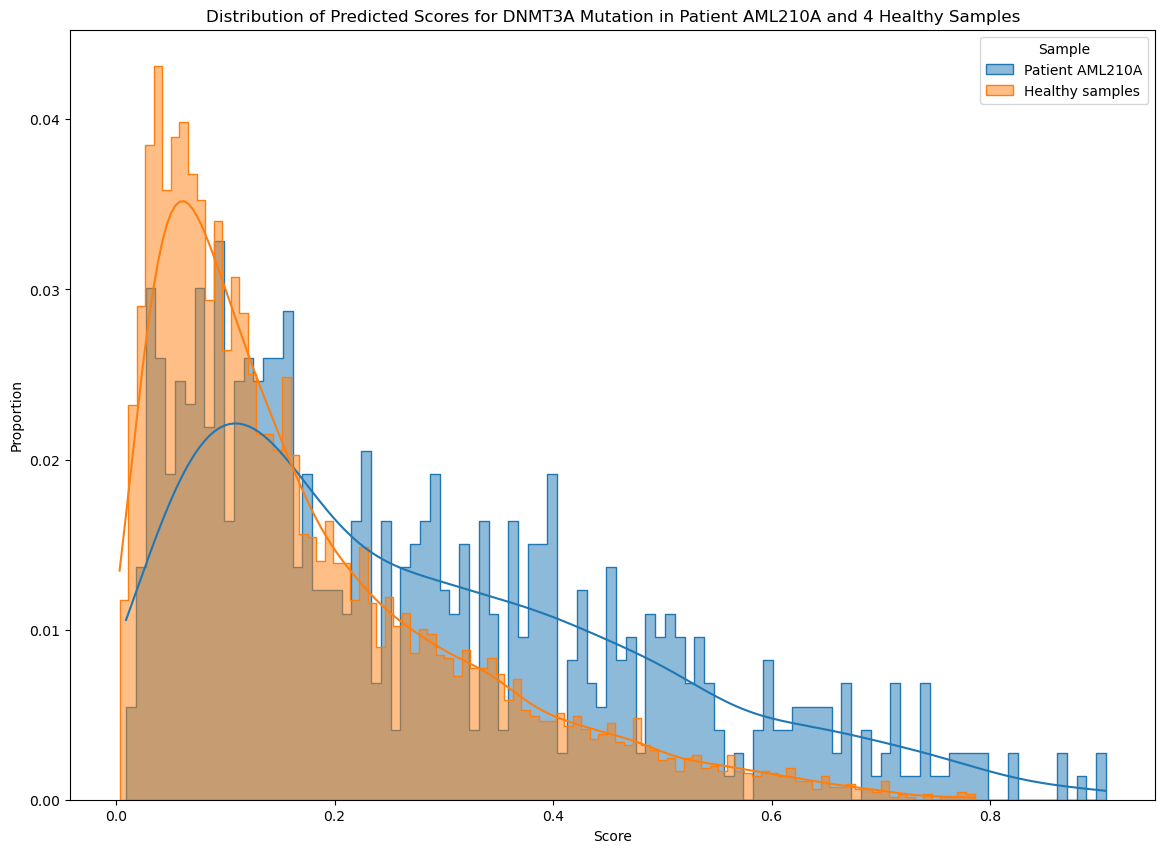

In [22]:
# Plot score proportions between the specified patient above versus the 4 healthy samples - this is using 
# the model trained on 100 integrated latent features generated by integrating the bulk and scRNA-seq data
# using Scanorama
plot_patient_vs_healthy_prop(integrated_data_trained_model, specific_patient, specific_mutation)


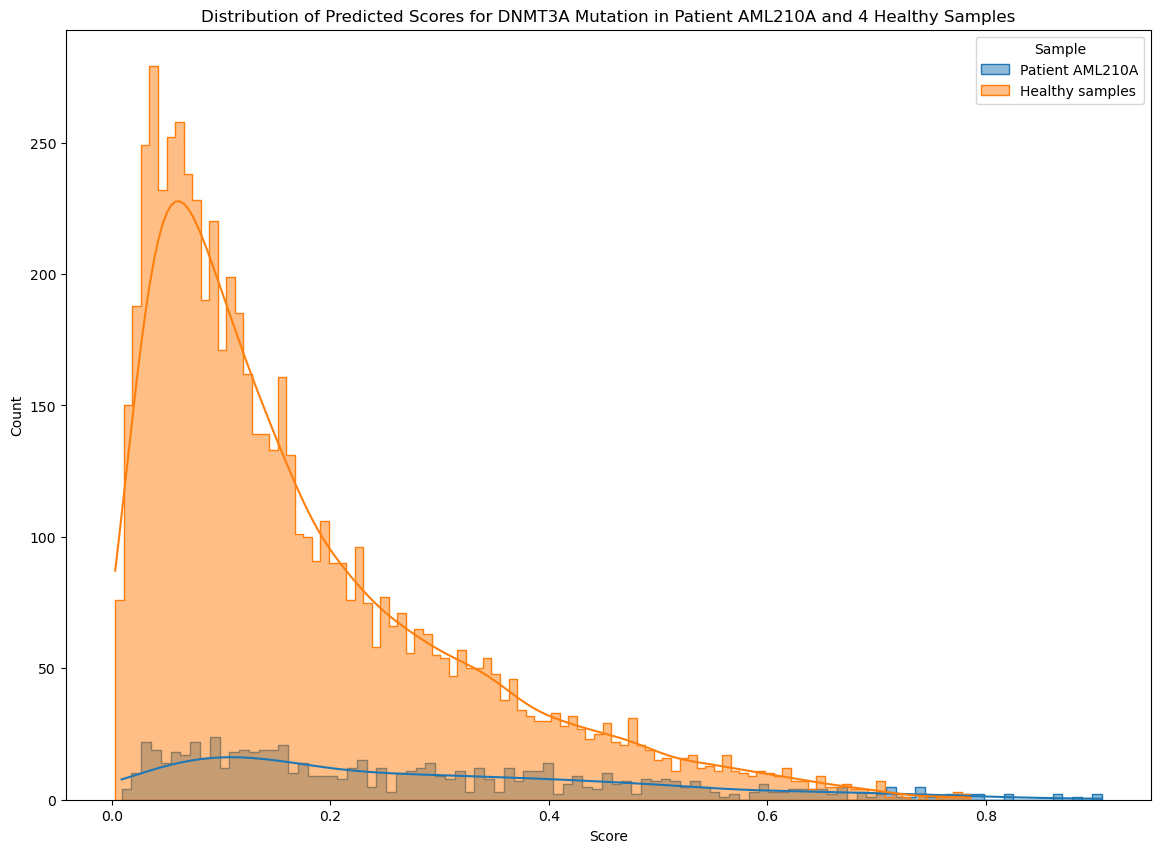

In [23]:
# Plot score total counts between the specified patient above versus the 4 healthy samples - this is using 
# the model trained on 100 integrated latent features generated by integrating the bulk and scRNA-seq data
# using Scanorama
plot_patient_vs_healthy_count(integrated_data_trained_model, specific_patient, specific_mutation)


predicted_probs BM1_AGGCGGGCGTGN-0         0.175513
BM1_ATAACATTTCAC-0         0.330155
BM1_ACGCTCTGGCCN-0         0.255889
BM1_TTGCACAGAGGA-0         0.296349
BM1_TGTCGTATGGAT-0         0.123301
                             ...   
OCI.AML3_TGAAAACACTTN-0    0.357812
OCI.AML3_TGCTCGTCGCGT-0    0.170112
OCI.AML3_TGCTGTCGCGCG-0    0.109820
OCI.AML3_TGTCCGCGCCCA-0    0.234240
OCI.AML3_TGTGTCAAGCGA-0    0.066330
Name: ridge_preds_DNMT3A, Length: 42668, dtype: float64


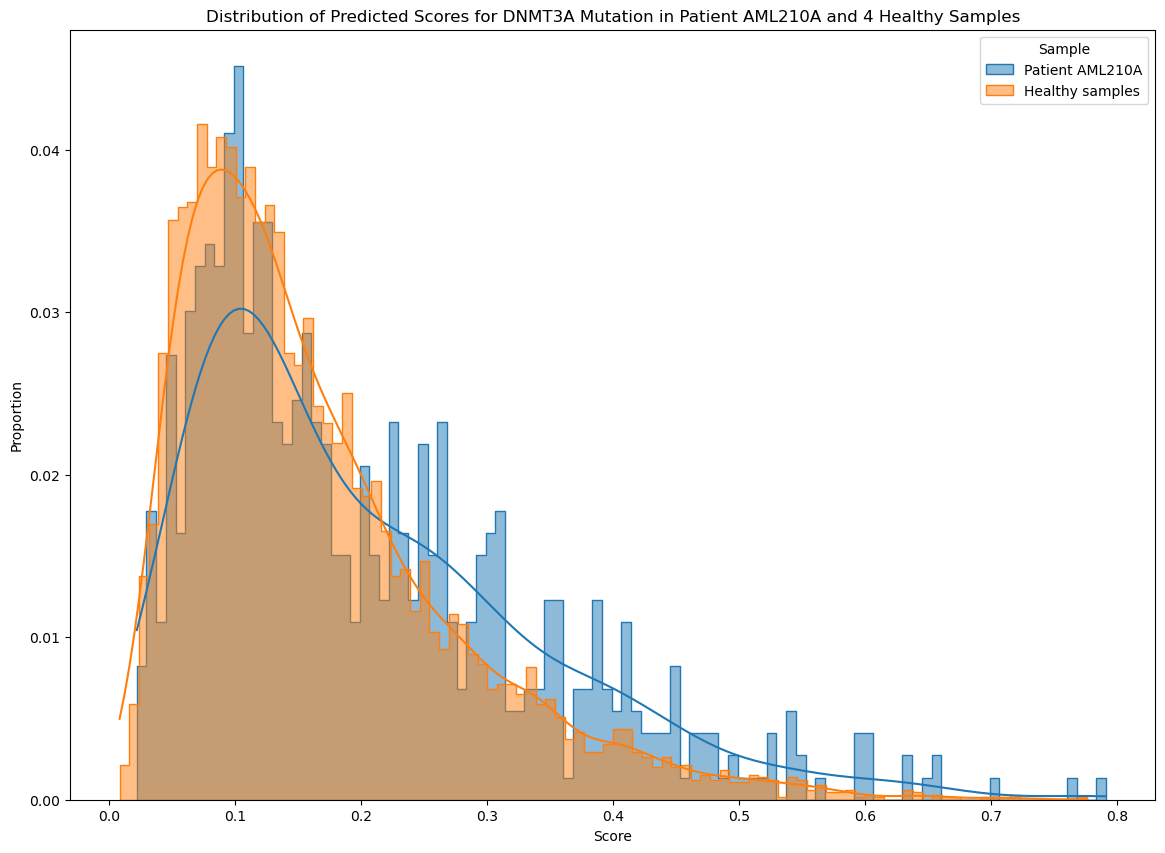

In [24]:
# Plot score proportion between the specified patient above versus the 4 healthy samples - this is using 
# the model trained on normalized/scaled gene features that the bulk and scRNA-seq data share.
plot_patient_vs_healthy_prop(variable_gene_data_trained_model, specific_patient, specific_mutation)


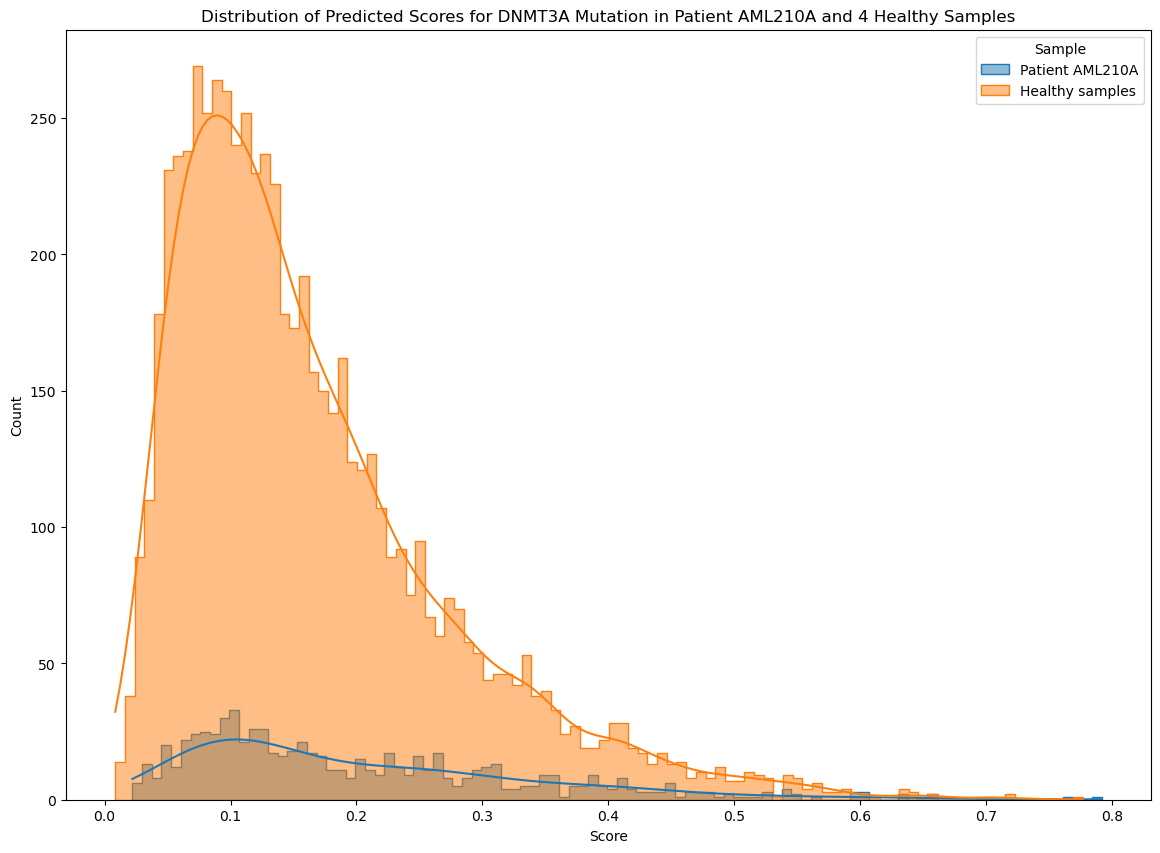

In [25]:
# Plot score count between the specified patient above versus the 4 healthy samples - this is using 
# the model trained on normalized/scaled gene features that the bulk and scRNA-seq data share.
plot_patient_vs_healthy_count(variable_gene_data_trained_model, specific_patient, specific_mutation)
